# Classification des entreprises



In [89]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


## Chargement des données

In [90]:
#referentiel base source
source_entreprise=pd.read_csv('base_source_enrichie.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_entreprise.shape

C:\Users\chris\AppData\Local\Temp\ipykernel_21728\1604957516.py:2: DtypeWarning: Columns (5,24,66,77) have mixed types. Specify dtype option on import or set low_memory=False.
  source_entreprise=pd.read_csv('base_source_enrichie.csv', encoding='utf-8', sep=',', on_bad_lines='skip')


(8500, 385)

In [91]:
colonnes = list(source_entreprise.columns)
for colonne in colonnes:
    print(colonne)

Unnamed: 0
estimated_revenue_estimated_revenue_2020
instagram_url
ape_code
indeed_about_content
banking_data_solde_credit_equipement
net_result_2018
cartography_liens_entreprises_personnes
derniere_mise_a_jour_rcs
banking_data_bdf_score
revenue_2020
additional_info_naf_code
estimated_revenue_average_growth_of_the_siren
revenue_2022
solvability_ratio_2019
corporate_officer_name
estimated_revenue_estimated_revenue_2021
estimated_revenue_estimated_growth_2023
gross_operating_ebitda_ratio_2018
company_name
ape_name
banking_data_insurance_locaux
current_liabilities_2020
banking_data_is_significantly_changing
cartography_error
banking_data_solde_courant_moyen
beneficiaires_effectifs
banking_data_insurance_vehicules_pro
marques
equity_2021
resultat_exploitation_ratio_2022
opportunities_of_the_siret
gross_operating_ebitda_2020
web_scrap
postal_address_postal_address_additional_name
strenghts_of_the_siret
current_liabilities_2018
last_number_of_employees
gross_operating_ebitda_ratio_2019
google

In [92]:
source_entreprise_extract=source_entreprise[['ape_code','revenue_2022','company_name','ape_name',
                                             'resultat_exploitation_ratio_2022','last_number_of_employees','enrollment',
                                             'corporate_object','equity_2022','current_assets_2022',
                                             'gross_operating_ebitda_ratio_2022','net_result_2022','current_liabilities_2022',
                                             'capital','roe_2022','indeed_job_results_count','google_business_notation',
                                             'additional_info_region_code','net_debt_2022','reimbursement_ratio_2022',
                                             'siren','commercial_name','siret','robustness_ratio_2022','glassdoor_notation',
                                             'societeinfo_growth_ratio_2022','gross_operating_ebitda_2022','region_index',
                                             'resultat_d_exploitation_2022','solvability_ratio_2022','type_ent',
                                             'resultat_exploitation_ratio','net_result','current_assets','equity',
                                             'current_liabilities','revenue','robustness_ratio','solvability_ratio',
                                             'net_debt','gross_operating_ebitda','gross_operating_ebitda_ratio','CAGR_18_22',
                                             'RCI_2022','RCI','total_fonds','equity_costs','taux de recrutement',
                                             'RdtCpx_2022','RdtCpx','FRN_2022','FRN','reimbursement_ratio','RCI_21_22',
                                             'capital_moy_sect','enrollment_moy_sect','last_number_of_employees_moy_sect',
                                             'employees_number_for_linkedin_moy_sect','revenue_2022_moy_sect',
                                             'net_result_2022_moy_sect','equity_2022_moy_sect','roe_2022_moy_sect',
                                             'net_debt_2022_moy_sect','current_assets_2022_moy_sect',
                                             'current_liabilities_2022_moy_sect','solvability_ratio_2022_moy_sect',
                                             'gross_operating_ebitda_2022_moy_sect','gross_operating_ebitda_ratio_2022_moy_sect',
                                             'gross_operating_ebitda_ratio_moy_sect','reimbursement_ratio_2022_moy_sect',
                                             'robustness_ratio_2022_moy_sect','societeinfo_growth_ratio_2022_moy_sect',
                                             'resultat_exploitation_ratio_2022_moy_sect','resultat_d_exploitation_2022_moy_sect',
                                             'resultat_exploitation_ratio_moy_sect','net_result_moy_sect','current_assets_moy_sect',
                                             'equity_moy_sect','current_liabilities_moy_sect','revenue_moy_sect',
                                             'reimbursement_ratio_moy_sect','robustness_ratio_moy_sect','solvability_ratio_moy_sect',
                                             'net_debt_moy_sect','gross_operating_ebitda_moy_sect','CAGR_18_22_moy_sect',
                                             'RCI_2022_moy_sect','RCI_moy_sect','total_fonds_moy_sect','equity_costs_moy_sect',
                                             'enrollment_sum','last_number_of_employees_sum','employees_number_for_linkedin_sum',
                                             'revenue_2022_sum','roe_2022_sum','net_debt_2022_sum','gross_operating_ebitda_2022_sum',
                                             'resultat_d_exploitation_2022_sum','net_result_sum','revenue_sum','net_debt_sum',
                                             'pdm','pdm_2022']]

In [93]:
colonnes = list(source_entreprise_extract.columns)
for colonne in colonnes:
    print(colonne)

ape_code
revenue_2022
company_name
ape_name
resultat_exploitation_ratio_2022
last_number_of_employees
enrollment
corporate_object
equity_2022
current_assets_2022
gross_operating_ebitda_ratio_2022
net_result_2022
current_liabilities_2022
capital
roe_2022
indeed_job_results_count
google_business_notation
additional_info_region_code
net_debt_2022
reimbursement_ratio_2022
siren
commercial_name
siret
robustness_ratio_2022
glassdoor_notation
societeinfo_growth_ratio_2022
gross_operating_ebitda_2022
region_index
resultat_d_exploitation_2022
solvability_ratio_2022
type_ent
resultat_exploitation_ratio
net_result
current_assets
equity
current_liabilities
revenue
robustness_ratio
solvability_ratio
net_debt
gross_operating_ebitda
gross_operating_ebitda_ratio
CAGR_18_22
RCI_2022
RCI
total_fonds
equity_costs
taux de recrutement
RdtCpx_2022
RdtCpx
FRN_2022
FRN
reimbursement_ratio
RCI_21_22
capital_moy_sect
enrollment_moy_sect
last_number_of_employees_moy_sect
employees_number_for_linkedin_moy_sect
re

In [94]:
# Remplacez 'source_entreprise_extract' par le nom réel de votre DataFrame
source_entreprise_extract = source_entreprise_extract.copy()

# Liste des colonnes pour lesquelles limiter les valeurs extrêmes
columns = ['societeinfo_growth_ratio_2022', 'societeinfo_growth_ratio_2022_moy_sect', 'solvability_ratio_2022', 'robustness_ratio_2022',
           'gross_operating_ebitda_ratio_2022', 'CAGR_18_22', 'reimbursement_ratio_2022']

# Remplacer les valeurs extrêmes pour chaque colonne
for col in columns:
    lower_bound = source_entreprise_extract[col].quantile(0.01)
    upper_bound = source_entreprise_extract[col].quantile(0.99)
    source_entreprise_extract[col] = source_entreprise_extract[col].clip(lower=lower_bound, upper=upper_bound)

# Affichez le nouveau résumé des statistiques pour vérifier les changements
for col in columns:
    print(f"{col} après remplacement des valeurs extrêmes:")
    print(source_entreprise_extract[col].describe())
    print("\n")  # Ajoute un espace entre les descriptions pour plus de clarté

societeinfo_growth_ratio_2022 après remplacement des valeurs extrêmes:
count    2041.000000
mean        0.200431
std         0.516429
min        -0.359020
25%         0.000000
50%         0.085690
75%         0.220478
max         3.887574
Name: societeinfo_growth_ratio_2022, dtype: float64


societeinfo_growth_ratio_2022_moy_sect après remplacement des valeurs extrêmes:
count    8140.000000
mean        1.008162
std         5.151775
min        -0.075664
25%         0.073988
50%         0.132026
75%         0.232439
max        35.675858
Name: societeinfo_growth_ratio_2022_moy_sect, dtype: float64


solvability_ratio_2022 après remplacement des valeurs extrêmes:
count    1954.000000
mean        2.831833
std         5.150568
min       -12.883067
25%         1.186110
50%         1.929726
75%         3.305464
max        37.044385
Name: solvability_ratio_2022, dtype: float64


robustness_ratio_2022 après remplacement des valeurs extrêmes:
count    1926.000000
mean        0.045415
std         

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

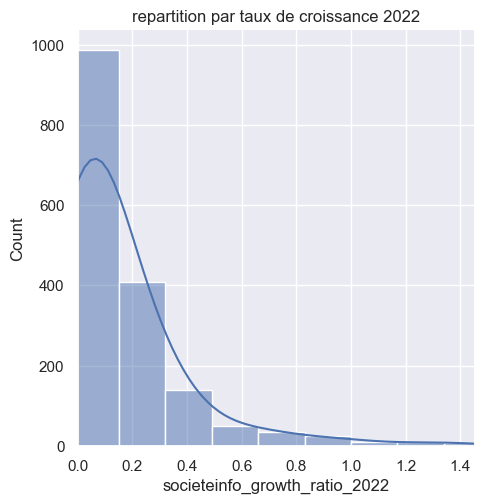

In [95]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(30)]  # Range de 0 à 140% par tranche de 15%

sns.displot(data=source_entreprise_extract, x='societeinfo_growth_ratio_2022', bins=25, kde=True) 
plt.title("repartition par taux de croissance 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

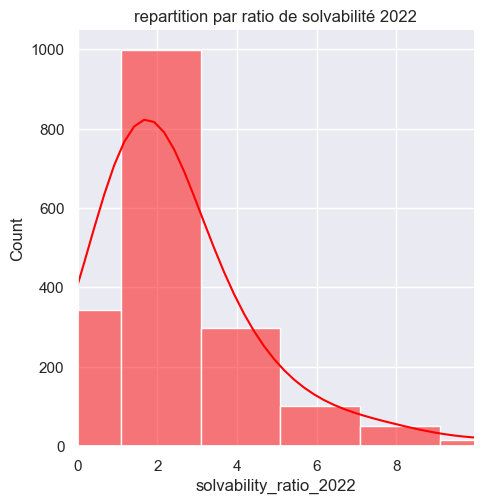

In [96]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(200)]  

sns.displot(data=source_entreprise_extract, x='solvability_ratio_2022', bins=25, color='red',kde=True) 
plt.title("repartition par ratio de solvabilité 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

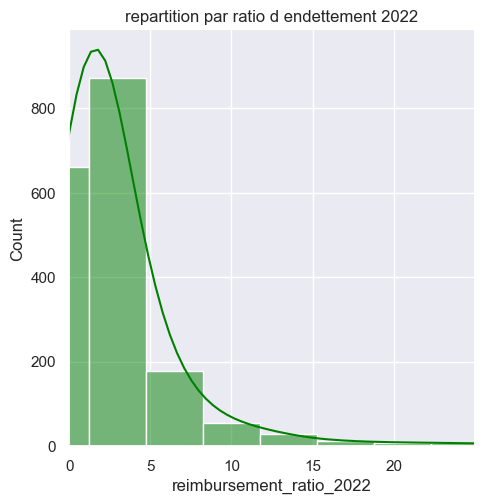

In [97]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(500)]  

sns.displot(data=source_entreprise_extract, x='reimbursement_ratio_2022', color='green', bins=25, kde=True) 
plt.title("repartition par ratio d endettement 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

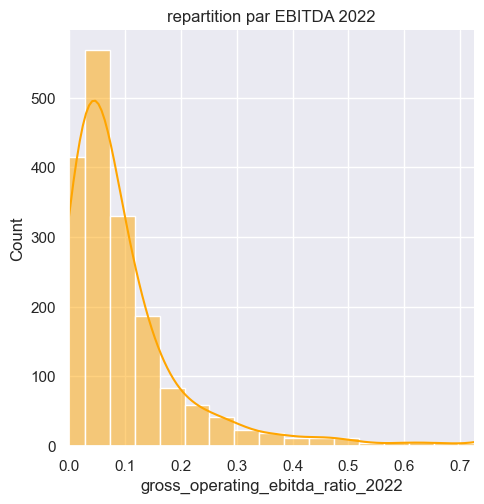

In [98]:

plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [-0.5 + 0.025 * i for i in range(50)]  

sns.displot(data=source_entreprise_extract, x='gross_operating_ebitda_ratio_2022', color='orange', bins=25, kde=True) 
plt.title("repartition par EBITDA 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

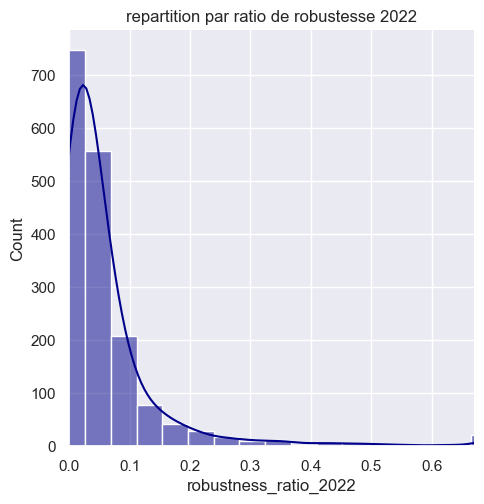

In [99]:

plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [-0.5 + 0.03 * i for i in range(40)]  

sns.displot(data=source_entreprise_extract, x='robustness_ratio_2022', color='darkblue', bins=25, kde=True) 
plt.title("repartition par ratio de robustesse 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

In [100]:
#referentiel base secteur
source_secteur=pd.read_csv('base_secteur_initiale.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_secteur.shape

(425, 162)

In [101]:
# classification manuelle de base source

def attribuer_classification(source_entreprise_extract):
    # Initialise la nouvelle colonne 'classification'
    source_entreprise_extract['classification'] = 'Non classifié'  # Valeur par défaut
    
    # Conditions pour 'Pépite'
    
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] >= 0.05) & (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5) &
        (source_entreprise_extract['CAGR_18_22'] > 0.03) & (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] > 0.2) &
        (source_entreprise_extract['robustness_ratio_2022'] > 0.07) & (source_entreprise_extract['solvability_ratio_2022'] > 1.5),
        'classification'] = 'Pépite'
    
    # Conditions pour 'À risque'
    
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0) & (source_entreprise_extract['reimbursement_ratio_2022'] > 2.5) &
        (source_entreprise_extract['CAGR_18_22'] < 0.03) & (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] < 0.10) &
        (source_entreprise_extract['robustness_ratio_2022'] < 0.02) & (source_entreprise_extract['solvability_ratio_2022'] < 1) ,
        'classification'] = 'À risque'
    
    # Conditions pour 'À surveiller'
    
    conditions_surveiller = (
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0).astype(int) + (source_entreprise_extract['reimbursement_ratio_2022'] > 2.5).astype(int) +
        (source_entreprise_extract['CAGR_18_22'] < 0.03).astype(int) + (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] < 0.10).astype(int) +
        (source_entreprise_extract['robustness_ratio_2022'] < 0.02).astype(int) + (source_entreprise_extract['solvability_ratio_2022'] < 1).astype(int) )
        
    source_entreprise_extract.loc[(conditions_surveiller >= 2) & (source_entreprise_extract['classification'] == 'Non classifié'), 'classification'] = 'À surveiller'
    
    # Conditions pour 'À potentiel'
    
    conditions_potentiel = (
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] >= 0.05).astype(int) + (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5).astype(int) +
        (source_entreprise_extract['CAGR_18_22'] > 0.03).astype(int) + (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] > 0.2).astype(int) +
        (source_entreprise_extract['robustness_ratio_2022'] > 0.07).astype(int) + (source_entreprise_extract['solvability_ratio_2022'] > 1.5).astype(int))
    
    source_entreprise_extract.loc[(conditions_potentiel >= 2) & (source_entreprise_extract['classification'] == 'Non classifié'), 'classification'] = 'À potentiel'
    
    # Retourne le DataFrame modifié
    return source_entreprise_extract

# Applique la fonction

source_entreprise_extract = attribuer_classification(source_entreprise_extract)


In [102]:
## CLASSEMENT MANUEL

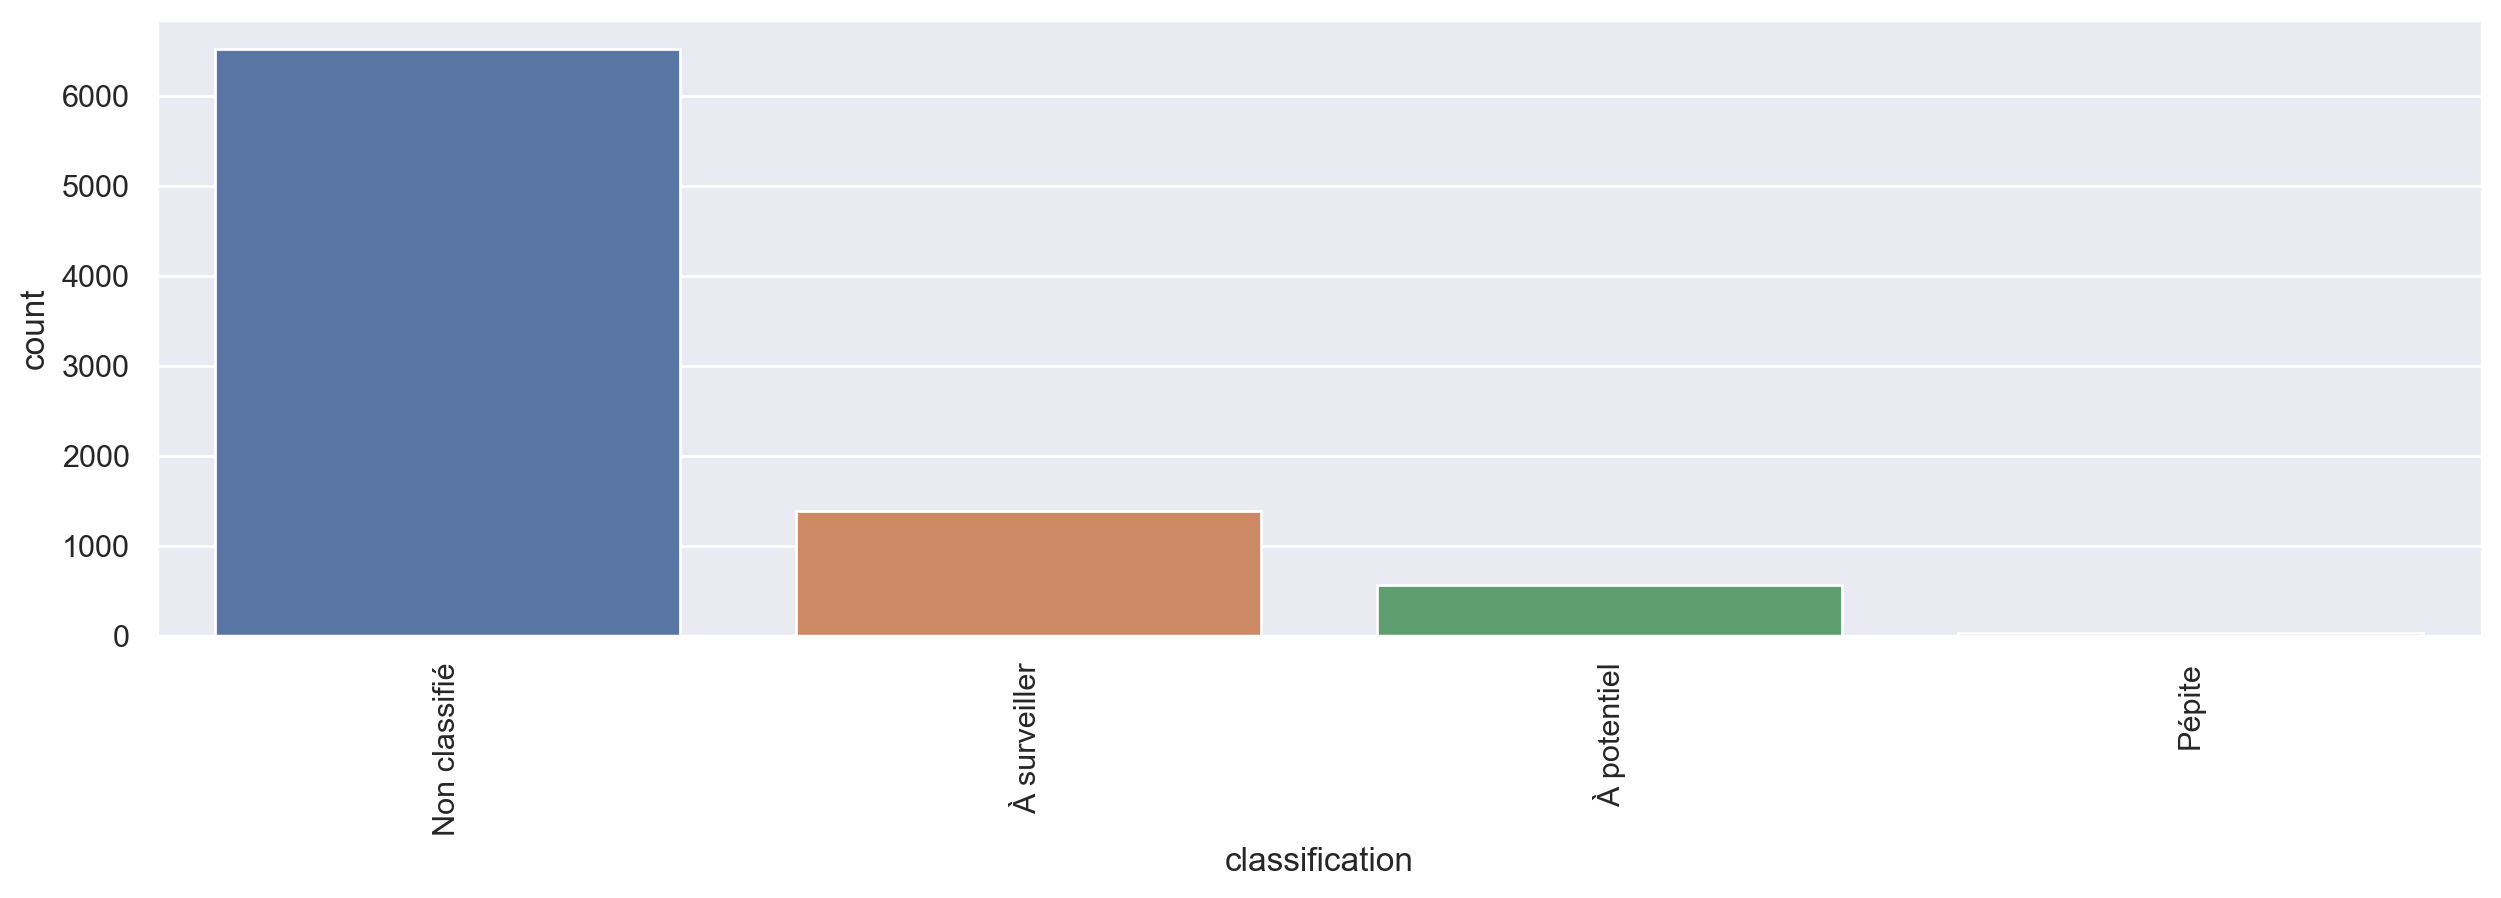

In [103]:

plt.figure(figsize=(15,4),dpi=200)
ax=sns.countplot(x='classification', data= source_entreprise_extract)

# Incliner les étiquettes de l'axe des x à 90 degrés
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [104]:
panel=source_entreprise_extract[source_entreprise_extract['classification']!='Non classifié']
panel.to_csv('echantillon.csv', index='siren')

In [105]:
nombre_par_categorie = source_entreprise_extract['classification'].value_counts()
print(nombre_par_categorie)

classification
Non classifié    6517
À surveiller     1391
À potentiel       565
Pépite             27
Name: count, dtype: int64


In [106]:
## CONSTITUTION DES DATAS DE TEST ET D 'ENTRAINEMENT'

In [107]:
echantillon = panel[['societeinfo_growth_ratio_2022','reimbursement_ratio_2022','CAGR_18_22',
                     'gross_operating_ebitda_ratio_2022','robustness_ratio_2022', 'solvability_ratio_2022']]

In [108]:
echantillon.shape

(1983, 6)

In [109]:
valeur_attendue = panel[['classification']]

In [110]:
valeur_attendue.shape

(1983, 1)

## Affichage des correlations entre criteres

Text(0.5, 1.0, 'Distribution solvabilité / robustesse')

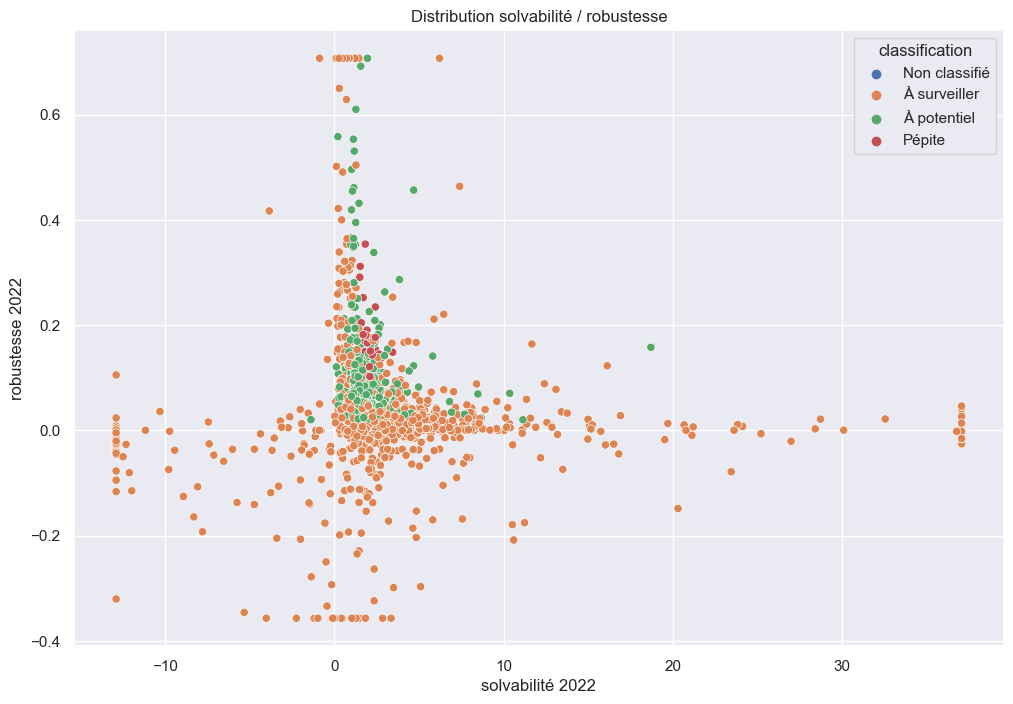

In [111]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='solvability_ratio_2022',y='robustness_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('solvabilité 2022')
plt.ylabel('robustesse 2022')
plt.title('Distribution solvabilité / robustesse')

Text(0.5, 1.0, 'Distribution croissance / endettement')

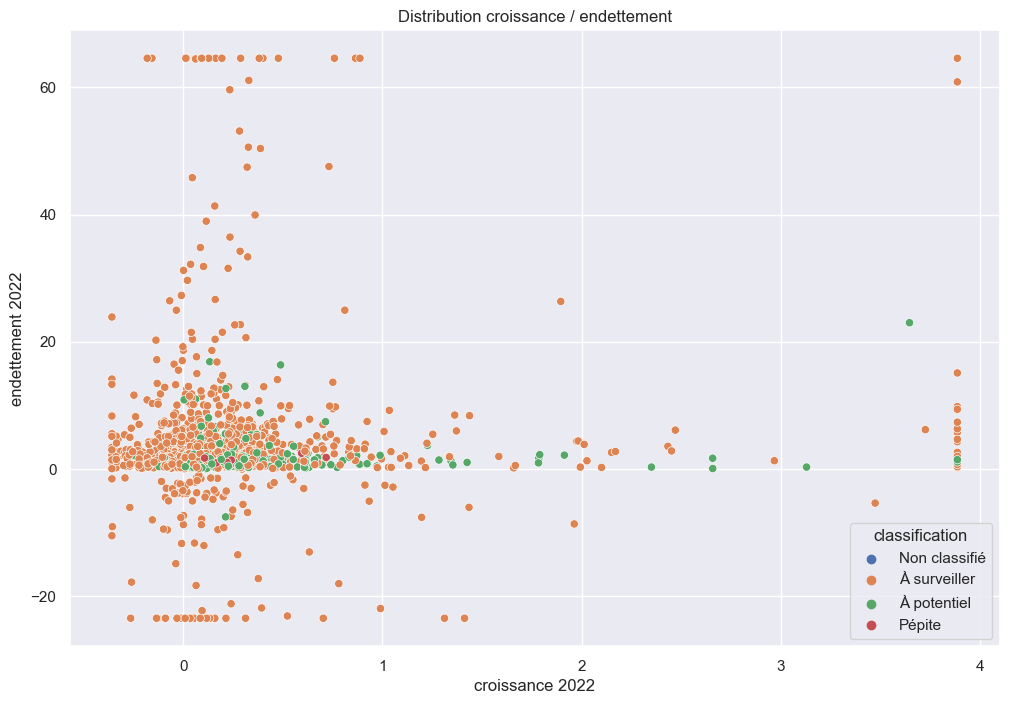

In [112]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='societeinfo_growth_ratio_2022',y='reimbursement_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('croissance 2022')
plt.ylabel('endettement 2022')
plt.title('Distribution croissance / endettement')

Text(0.5, 1.0, 'Distribution croissance / rentabilité')

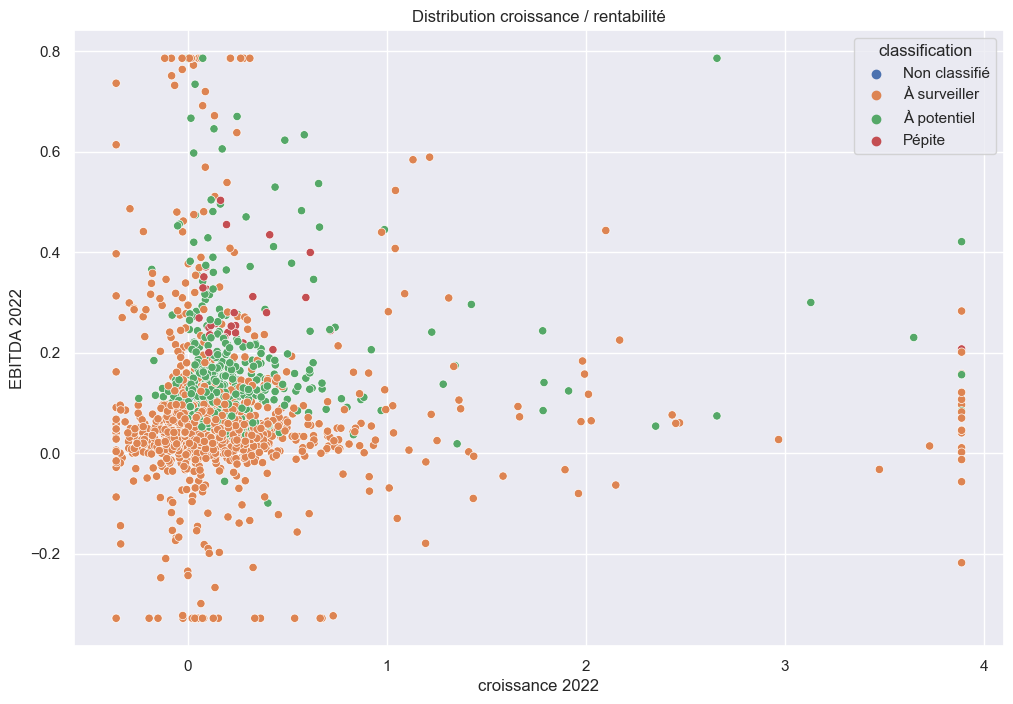

In [113]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='societeinfo_growth_ratio_2022',y='gross_operating_ebitda_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('croissance 2022')
plt.ylabel('EBITDA 2022')
plt.title('Distribution croissance / rentabilité')

## Modèle de Regression Logistique (Regression Logistic model)

Nous allons créer un modèle qui va prédire si un échantillon appartient à une des catégories.



## Function Sigmoïde (Sigmoide function)



Text(0.5, 1.0, 'Fonction Sigmoïde')

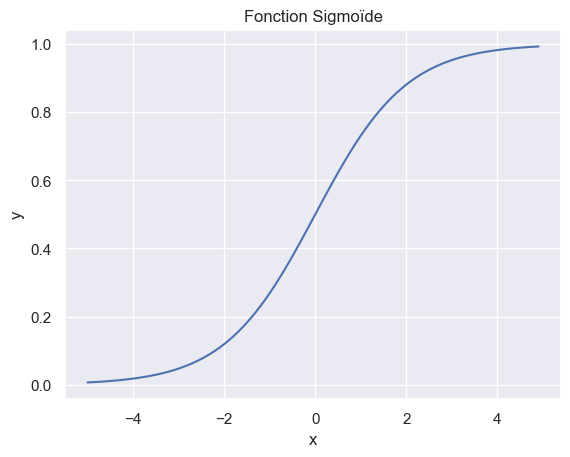

In [114]:
# La fonction Sigmoïde est utilisée en regression logistique et dans les neurones artificiels. 
# C'est une manière de transformer des valeurs continues en valeurs binaires. Cette fonction est également appellée 
# "Fonction d'activation" dans les réseaux de neurones.


def sigmoid(z):
  return 1.0/(1 + math.exp(-z))

x = [i * 0.1 for i in range(-50, 50)]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fonction Sigmoïde')

## Fonction de prédiction (Prediction Function)




In [115]:
# Cette fonction prend un échantillon et multiplie les caractéristiques par les poids, ajoute l'offset et passe la valeur 
# obtenue dans la fonction Sigmoïde.

# Cette fonction sera utilisée pour déterminer les poids et l'offset à utliser pendant la phase d'apprentissage, 
# ainsi que pour faire les prédictions une fois l'entrainement du modèle terminé.


def predict(echantillon):
  result  = 0.0
  for i in range(len(echantillon)):
    result = result + poids[i] * echantillon[i]
    
  result = result + offset
  return sigmoid(result)

## Fonctions de Perte et de Coût (Loss and Cost Functions)



In [116]:
# La fonction de perte (Loss function en Anglais) compare la valeur prédite à partir d'un échantillon 
# (la valeur prédite est calculée par la fonction de prédiction) avec la valeur attendue (la valeur qu'on devrait trouver 

# Si la valeur absolue de la différence entre ce qui est prédit et ce qui est attendu est grande, la fonction de perte
# doit retourner une grande valeur. Inversement, si la valeur absolue de la différence entre ce qui est prédit et ce qui 
# est attendu est faible, la fonction de perte doit retourner une faible valeur.

def pertes(y_attendu, y_predit):
  return -(y_attendu * math.log(y_predit) + (1.0 - y_attendu) * math.log(1 - y_predit))

Nous pouvons regarder à quoi ressemble cette fonction pour une valeur attendue fixe (ici 0.9) en fonction des valeurs prédites (ici allant de 0.1 à 1).

On observe bien que les pertes diminuent lorsque la valeur prédite se rapproche la valeur attendue :

Text(0.5, 1.0, 'Pertes en fonction des valeurs prédites pour une valeur attendue de 0.90')

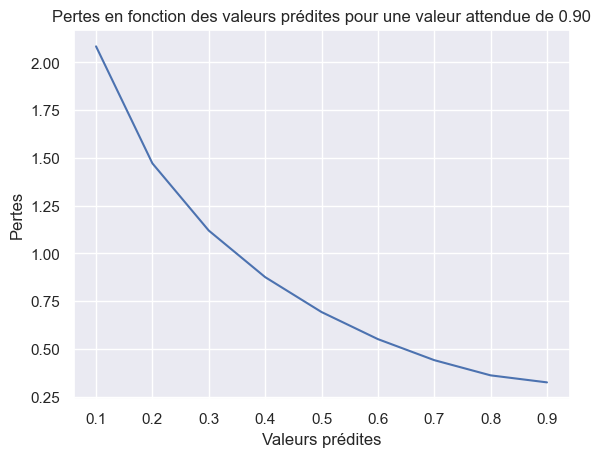

In [117]:
y_attendu = 0.9
x = [i * 0.1 for i in range(1, 10)]
y = [pertes(y_attendu, yp) for yp in x]
plt.plot(x, y)
plt.xlabel('Valeurs prédites')
plt.ylabel('Pertes')
plt.title('Pertes en fonction des valeurs prédites pour une valeur attendue de %0.2f' % y_attendu)

La fonction de coût est la valeur moyenne des pertes pour tous les échantillons testés. Ainsi, par exemple si on a testé 10 échantillons avec les résultats suivants alors le coût sera de 0.3 :

<img src="https://github.com/AlexandreBourrieau/ML-F1/blob/master/Regression/images/Tableau.png?raw=1" width="500"/>

Mathématiquement, pour un nombre m d'échantillons testés, le coût (noté J) peut être exprimé de la manière suivante :

$$\mathcal J = \frac{1}{m} \sum_{i=1}^{m} \mathcal L(y, \hat y)$$

## Algorithme du Gradient (Gradient Descent Algorithm)



Text(0.5, 1.0, 'Fonction Coût (J)')

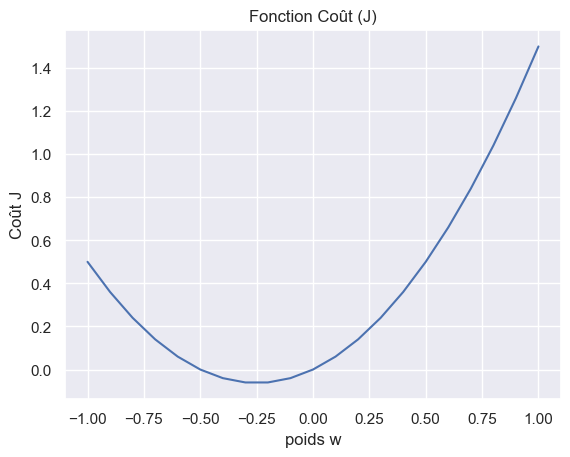

In [118]:
# L'algorithme du gradient a pour but d'ajuster les poids et l'offset du modèle afin de minimiser le coût, 
# et donc d'obtenir le modèle le plus juste possible. L'algorithme du gradient calcule la dérivée (gradient), 
# c'est-à-dire la pente, de la fonction de coût pour différentes valeurs de poids et d'offsets.

def cout(w):
    return w**2 + w/2.0

w = [i * 0.1 for i in range(-10, 11)]
J = [cout(wi) for wi in w]
plt.plot(w, J)
plt.xlabel('poids w')
plt.ylabel('Coût J')
plt.title('Fonction Coût (J)')

La dérivée de cette fonction par rapport au poids $w$ est :

$$J'(w) = 2w + 0.5$$

Pour trouver le minimum avec l'algorithme du gradient, nous devons itérer cette équation :

$$w_{k+1} = w_{k} - \alpha J'(w)$$

Minimum -0.25, -0.06
Derivée (gradient) 0.00


Text(0.5, 1.0, 'Fonction parabolique')

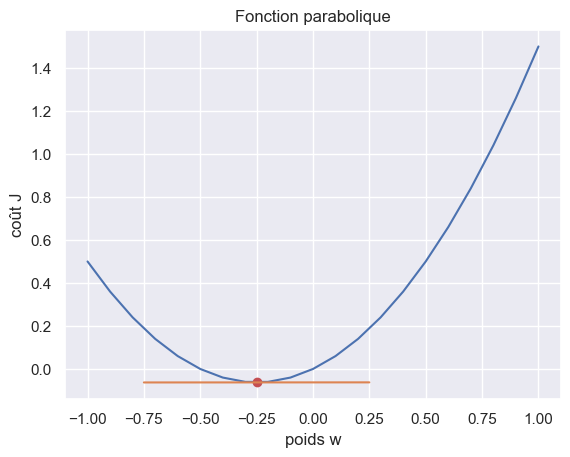

In [119]:
w_k = 0.0

taux_apprentissage = 0.8

def derive(w):
  return 2*w + 0.5

for i in range(15):
    gradient = derive(w_k)
    w_k = w_k - taux_apprentissage*gradient

print('Minimum %0.2f, %0.2f' % (w_k, cout(w_k)))
print('Derivée (gradient) %0.2f' % gradient)

w = [i * 0.1 for i in range(-10, 11)]
J = [cout(wi) for wi in w]
plt.plot(w, J)
plt.xlabel('poids w')
plt.ylabel('coût J')
plt.plot(w_k, cout(w_k), 'ro')
line_x = [w_k - 0.5, w_k + 0.5]
line_y = [gradient*(wi-w_k)+cout(w_k) for wi in line_x]
plt.plot(line_x, line_y)
plt.title('Fonction parabolique')

## Rétropropagation du gradient



In [120]:
# La rétropropagation du gradient est un algorithme très utlisé pour l'entrainement des modèles d'apprentissage automatique. 
# Son objectif est de trouver les poids et l'offset qui minimisent les écarts entre les valeurs attendues et celles prédites 
# par le modèle.

# nbr_caracteristiques = 6

def entrainement_sur_une_iteration(echantillon_train, valeur_attendue_train):
  pertes_totales = 0.0                # Initialise la somme des pertes à 0
  dLw = [0.0] * nbr_caracteristiques  # dLw permettra de stocker les variations des pertes L par rapport aux poids w : L'(w)
  dJw = [0.0] * nbr_caracteristiques  # dJw permettra de stocker les variations du cout par rapport aux poids w : J'(w)
  dLb = 0.0                           # dLb permettra de stocker la variation des pertes L par rapport à l'offset b : L'(b)
  dJb = 0.0                           # dJb permettra de stocker la variation du cout par rapport à l'offset b : J'(b)

  global offset, poids

  m = len(echantillon_train)                   # m contient le nombre d'échantillons (150)
  for i in range(m):
    ech = echantillon_train[i]                 # ech contient le i-ème échantillon : [longueur_sépale, largeur_sépale, longueur_pétale, largeur_pétale]
    val_attendue = valeur_attendue_train[i]   # val_attendue contient la valeur attendue pour cet echantillon que doit retourner le modèle (0 ou 1)
    valeur_predite = predict(ech)         # Appel de la fonction de prédiction pour calculer la valeur prédite par le modèle sur cet échantillon 
    pertes_totales = pertes_totales + pertes(val_attendue, valeur_predite)   # Additionne les pertes de chaque échantillon afin de calculer le coût
    
    # Pour chaque poids, on somme la variation des pertes par rapport aux poids w : sigma[L'(w)]
    for j in range(len(poids)):
      dLw[j] = dLw[j] + ech[j]*(valeur_predite - val_attendue)

    # On somme la variation des pertes en fonction de l'offset b : sigma[L'(b)]
    dLb = dLb + (valeur_predite - val_attendue)
  
  cout = pertes_totales / m                 # Le coût J est la valeur moyenne des pertes sur l'ensemble des 150 échantillons
  dJb = dLb / m                             # Calcul la variation du coût par rapport à l'offset J'(b) : Le coût est la moyenne de la variation des pertes sur l'ensemble des 150 échantillons
  offset = offset - taux_apprentissage*dJb  # Applique l'algorithme du gradient sur l'offset : bk+1 = bk - alpha*J'(b)

  for j in range(len(poids)):
    dJw[j] = dLw[j] / m       # Calcule la variation du coût par rapport au j-ème poids J'(w)
    poids[j] = poids[j] - taux_apprentissage*dJw[j]    # Applique l'algortithme du gradient sur le j-ème poids : wk+1 = wk - alpha*J'(w)
  
  return cout

## Algorithme d'entrainement du modèle

Cet algorithme va itérer l'algorithme de rétropopagation du gradient de nombreuses fois afin de minimiser les poids et l'offset.

In [121]:
model = Sequential()
model.add(Dense(1,activation="sigmoid",input_shape=(6,)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 7         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
X_train, X_test, y_train, y_test = train_test_split(echantillon, valeur_attendue, test_size=0.3)

In [123]:
X_train.shape

(1388, 6)

In [124]:
X_test.shape

(595, 6)

In [125]:
y_train

,classification
5579,À surveiller
5157,À surveiller
4225,À surveiller
7489,À surveiller
5804,À potentiel
...,...
5260,À surveiller
3025,À surveiller
1896,À surveiller
5352,À surveiller


In [131]:
y_test

,classification
852,À surveiller
6002,À surveiller
6145,À potentiel
5039,À surveiller
1346,À surveiller
...,...
6046,À surveiller
5162,À surveiller
5874,À potentiel
6497,À surveiller


In [130]:
print("Taille de X_train:", X_train.shape[0])
print("Taille de train_labels:", train_labels.shape[0])
print("Taille de X_test:", X_test.shape[0])
print("Taille de test_labels:", test_labels.shape[0])

Taille de X_train: 1388
Taille de train_labels: 1
Taille de X_test: 595
Taille de test_labels: 1


In [133]:
np.asarray(y_train)

array([['À surveiller'],
       ['À surveiller'],
       ['À surveiller'],
       ...,
       ['À surveiller'],
       ['À surveiller'],
       ['À surveiller']], dtype=object)

In [128]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [134]:
historique = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, validation_data=(X_test,y_test))

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node binary_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\chris\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\chris\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\chris\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\chris\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\chris\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\chris\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\chris\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\chris\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\chris\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\chris\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\chris\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\chris\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\chris\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\chris\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\chris\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\chris\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\chris\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\chris\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\chris\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\chris\AppData\Local\Temp\ipykernel_21728\953087955.py", line 1, in <module>

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\losses.py", line 2521, in binary_crossentropy

Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_837681]

Pertes (Test) : 0.6939635276794434
Précision (Test) : 0.5260504484176636


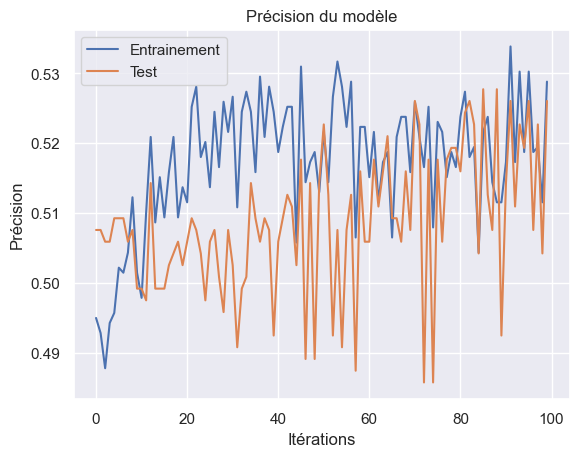

In [80]:
# Evalue la précision du modèle avec les données de tests
score = model.evaluate(X_test, test_labels, verbose=0)
print('Pertes (Test) :', score[0])
print('Précision (Test) :', score[1])

# Affiche les informations
plt.plot(historique.history['accuracy'])
plt.plot(historique.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Itérations')
plt.legend(['Entrainement', 'Test'], loc='upper left')
plt.show()

In [81]:
model.predict(X_train)

44/44 [==============================] - 0s 668us/step


array([[0.48353633],
       [0.4716132 ],
       [0.50053304],
       ...,
       [0.48902974],
       [0.4885982 ],
       [0.4599428 ]], dtype=float32)

In [82]:
predictions = []

echantillons_a_tester = X_test
valeurs_attendues_des_echantillons = test_labels

m = len(echantillons_a_tester)
correct = 0
for i in range(m):
  ech = echantillons_a_tester[i]
  valeur_predite = model.predict(tf.expand_dims(ech,0))
  if valeur_predite >= 0.5:
    valeur_predite = 1
  else:
    valeur_predite = 0
  predictions.append(valeur_predite)
  if valeur_predite == valeurs_attendues_des_echantillons[i]:
    correct = correct + 1.0

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 16ms/step


In [83]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


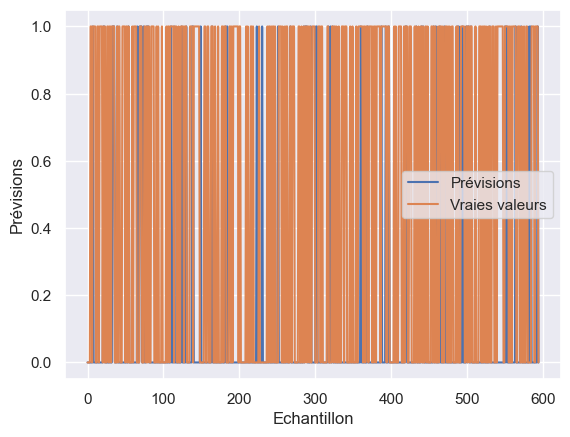

Précision: 52.61 %


In [84]:
plt.plot(range(m), predictions, label='Prévisions')
plt.plot(range(m), valeurs_attendues_des_echantillons, label='Vraies valeurs')
plt.ylabel('Prévisions')
plt.xlabel('Echantillon')
plt.legend(loc='best')
plt.show()

print('Précision: %.2f %%' % (100 * correct/m))

In [85]:
model = Sequential()
model.add(Dense(4,input_shape=(4,)))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(32))
model.add(Dense(8))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2693 (10.52 KB)
Trainable params: 2693 (10.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
classe_a_identifier = 1

train_labels = np.asarray([1 if y == classe_a_identifier else 0 for y in y_train])
test_labels = np.asarray([1 if y == classe_a_identifier else 0 for y in y_test])

In [87]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [88]:
historique = model.fit(X_train, train_labels, epochs=100, batch_size=1, verbose=1, validation_data=(X_test,test_labels))

Epoch 1/100


ValueError: in user code:

    File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\chris\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 4), found shape=(1, 6)


In [ ]:
# Evalue la précision du modèle avec les données de tests
score = model.evaluate(X_test, test_labels, verbose=0)
print('Pertes (Test) :', score[0])
print('Précision (Test) :', score[1])

# Affiche les informations
plt.plot(historique.history['accuracy'])
plt.plot(historique.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Itérations')
plt.legend(['Entrainement', 'Test'], loc='upper left')
plt.show()

In [ ]:
predictions = []

echantillons_a_tester = X_test
valeurs_attendues_des_echantillons = test_labels

m = len(echantillons_a_tester)
correct = 0
for i in range(m):
  ech = echantillons_a_tester[i]
  valeur_predite = model.predict(tf.expand_dims(ech,0))
  if valeur_predite >= 0.5:
    valeur_predite = 1
  else:
    valeur_predite = 0
  predictions.append(valeur_predite)
  if valeur_predite == valeurs_attendues_des_echantillons[i]:
    correct = correct + 1.0